In [1]:
import pandas as pd
import torch
import transformers
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [10]:
# Load the dataset
data = pd.read_csv('DATASET.csv')

# Split the data into features (X) and target (y)
X = data.drop('MI', axis=1)
y = data['MI']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate logistic regression model using tabular features
logreg_reg = LogisticRegression(penalty='l2', C=1.0)
logreg_reg.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
# Calculate training accuracy for logistic regression
y_train_pred_logreg = logreg.predict(X_train)
train_accuracy_logreg = accuracy_score(y_train, y_train_pred_logreg)

# Calculate test accuracy for logistic regression
y_test_pred_logreg = logreg.predict(X_test)
test_accuracy_logreg = accuracy_score(y_test, y_test_pred_logreg)

print("Logistic Regression Model:")
print("Train Accuracy:", train_accuracy_logreg)
print("Test Accuracy:", test_accuracy_logreg)

Logistic Regression Model:
Train Accuracy: 0.9092495636998255
Test Accuracy: 0.9302325581395349


In [12]:
# Load pre-trained BERT tokenizer and model
model_name = 'bert-base-uncased'
tokenizer = transformers.BertTokenizer.from_pretrained(model_name)
bert_model = transformers.BertModel.from_pretrained(model_name)

# Placeholder for BERT features
text_features = []


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [15]:
# Process each text entry using BERT
text_features = []
for index, row in data.iterrows():
    text = ' '.join(str(value) for value in row[['Age', 'Gender', 'ECG', 'CKMB', 'TROP-I', 'LAD', 'LCA', 'RCA', 'Systolic', 'Diastolic', 'Chest_Pain', 'Diabetic', 'Cholesterol', 'PHF /family history']])
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    outputs = bert_model(**inputs)
    pooled_output = outputs.pooler_output
    pooled_output = pooled_output.squeeze().detach().numpy()
    text_features.append(pooled_output)

# Convert text_features to torch tensor
text_features = torch.tensor(text_features)

# Combine BERT features with tabular features
combined_features = torch.cat([text_features, torch.tensor(X.values)], dim=1)


<ipython-input-15-5e7006e13de3>:12: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:275.)
  text_features = torch.tensor(text_features)


In [16]:
# Split data into train and test sets
X_train_bert, X_test_bert, y_train_bert, y_test_bert = train_test_split(combined_features, y, test_size=0.2, random_state=42)

# Train and evaluate logistic regression model using combined BERT and tabular features
logreg_bert = LogisticRegression()
logreg_bert.fit(X_train_bert, y_train_bert)

# Calculate training accuracy for logistic regression with BERT
y_train_pred_bert = logreg_bert.predict(X_train_bert)
train_accuracy_bert = accuracy_score(y_train_bert, y_train_pred_bert)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
# Calculate test accuracy for logistic regression with BERT
y_test_pred_bert = logreg_bert.predict(X_test_bert)
test_accuracy_bert = accuracy_score(y_test_bert, y_test_pred_bert)

print("\nBERT-Based Logistic Regression Model:")
print("Train Accuracy:", train_accuracy_bert)
print("Test Accuracy:", test_accuracy_bert)


BERT-Based Logistic Regression Model:
Train Accuracy: 0.9243746364165212
Test Accuracy: 0.9348837209302325


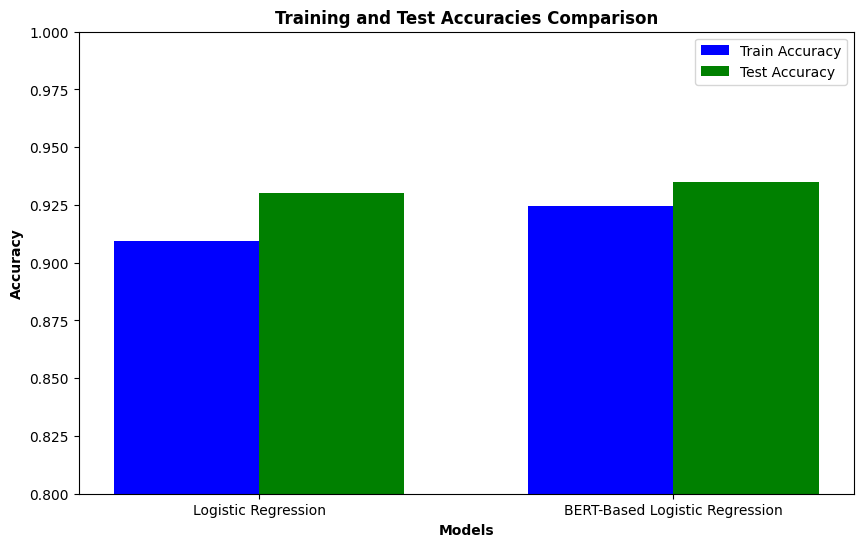

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Define model names and their respective accuracies
models = ["Logistic Regression", "BERT-Based Logistic Regression"]
train_accuracies = [train_accuracy_logreg, train_accuracy_bert]
test_accuracies = [test_accuracy_logreg, test_accuracy_bert]

# Set width of bars
bar_width = 0.35

# Set position of bar on X axis
r1 = np.arange(len(models))  # For train accuracy
r2 = [x + bar_width for x in r1]  # For test accuracy

# Plotting the bar chart for train and test accuracies
plt.figure(figsize=(10, 6))
plt.bar(r1, train_accuracies, color='blue', width=bar_width, label='Train Accuracy')
plt.bar(r2, test_accuracies, color='green', width=bar_width, label='Test Accuracy')

# Add labels, title, and legend
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(models))], models)
plt.ylabel('Accuracy', fontweight='bold')
plt.title('Training and Test Accuracies Comparison', fontweight='bold')
plt.ylim(0.8, 1.0)  # Set y-axis limits for better visualization
plt.legend()

# Display the plot
plt.show()
